<a href="https://colab.research.google.com/github/0HOON/Data-processing-with-Python/blob/master/Chapter1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1장 서울시 구별 CCTV  현황 분석

In [0]:
import pandas as pd

In [0]:
from google.colab import drive

drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
CCTV_Seoul = pd.read_csv('/content/gdrive/My Drive/Data/CCTV_in_Seoul.csv', encoding='utf-8')
CCTV_Seoul.head()

,기관명,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,3238,1292,430,584,932
1,강동구,1010,379,99,155,377
2,강북구,831,369,120,138,204
3,강서구,911,388,258,184,81
4,관악구,2109,846,260,390,613


In [0]:
CCTV_Seoul.columns

Index(['기관명', '소계', '2013년도 이전', '2014년', '2015년', '2016년'], dtype='object')

In [0]:
CCTV_Seoul.columns[0]

'기관명'

In [0]:
CCTV_Seoul.rename(columns={CCTV_Seoul.columns[0] : '구별'}, inplace=True)
CCTV_Seoul.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,3238,1292,430,584,932
1,강동구,1010,379,99,155,377
2,강북구,831,369,120,138,204
3,강서구,911,388,258,184,81
4,관악구,2109,846,260,390,613


In [0]:
pop_Seoul = pd.read_excel('/content/gdrive/My Drive/Data/population_in_Seoul.xls', encoding='utf-8')
pop_Seoul.head()


,기간,자치구,세대,인구,인구.1,인구.2,인구.3,인구.4,인구.5,인구.6,인구.7,인구.8,세대당인구,65세이상고령자
0,기간,자치구,세대,합계,합계,합계,한국인,한국인,한국인,등록외국인,등록외국인,등록외국인,세대당인구,65세이상고령자
1,기간,자치구,세대,계,남자,여자,계,남자,여자,계,남자,여자,세대당인구,65세이상고령자
2,2019.1/4,합계,4290922,10054979,4909387,5145592,9770216,4772134,4998082,284763,137253,147510,2.28,1436125
3,2019.1/4,종로구,73914,162913,78963,83950,152778,74536,78242,10135,4427,5708,2.07,26981
4,2019.1/4,중구,61800,135836,66720,69116,125942,61992,63950,9894,4728,5166,2.04,22421


In [0]:
pop_Seoul = pd.read_excel('/content/gdrive/My Drive/Data/population_in_Seoul.xls', encoding='utf-8', header=2, parse_cols='B, D, G, J, N')
pop_Seoul.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: the 'parse_cols' keyword is deprecated, use 'usecols' instead
  """Entry point for launching an IPython kernel.


,자치구,계,계.1,계.2,65세이상고령자
0,합계,10054979,9770216,284763,1436125
1,종로구,162913,152778,10135,26981
2,중구,135836,125942,9894,22421
3,용산구,245139,229168,15971,38049
4,성동구,314608,306404,8204,43076


In [0]:
pop_Seoul.rename(columns={pop_Seoul.columns[0] : '구별',
                          pop_Seoul.columns[1] : '인구수',
                          pop_Seoul.columns[2] : '한국인',
                          pop_Seoul.columns[3] : '외국인',
                          pop_Seoul.columns[4] : '고령자'}, inplace=True)
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자
0,합계,10054979,9770216,284763,1436125
1,종로구,162913,152778,10135,26981
2,중구,135836,125942,9894,22421
3,용산구,245139,229168,15971,38049
4,성동구,314608,306404,8204,43076


In [0]:
CCTV_Seoul.sort_values(by='소계', ascending=True).head(5)

,구별,소계,2013년도 이전,2014년,2015년,2016년
9,도봉구,825,238,159,42,386
2,강북구,831,369,120,138,204
5,광진구,878,573,78,53,174
3,강서구,911,388,258,184,81
24,중랑구,916,509,121,177,109


In [0]:
 CCTV_Seoul.sort_values(by='소계', ascending=False).head(5)

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,3238,1292,430,584,932
18,양천구,2482,1843,142,30,467
14,서초구,2297,1406,157,336,398
4,관악구,2109,846,260,390,613
21,은평구,2108,1138,224,278,468


In [0]:
CCTV_Seoul['최근증가율'] = (CCTV_Seoul['2016년']+ CCTV_Seoul['2015년']+ CCTV_Seoul['2014년'])/CCTV_Seoul['2013년도 이전'] *100
CCTV_Seoul.sort_values(by='최근증가율', ascending=False).head(5)

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율
22,종로구,1619,464,314,211,630,248.922414
9,도봉구,825,238,159,42,386,246.638655
12,마포구,980,314,118,169,379,212.101911
8,노원구,1566,542,57,451,516,188.929889
1,강동구,1010,379,99,155,377,166.490765


In [0]:
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자
0,합계,10054979,9770216,284763,1436125
1,종로구,162913,152778,10135,26981
2,중구,135836,125942,9894,22421
3,용산구,245139,229168,15971,38049
4,성동구,314608,306404,8204,43076


In [0]:
pop_Seoul.drop([0], inplace=True)
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자
1,종로구,162913,152778,10135,26981
2,중구,135836,125942,9894,22421
3,용산구,245139,229168,15971,38049
4,성동구,314608,306404,8204,43076
5,광진구,370658,354873,15785,46288


In [0]:
pop_Seoul['구별'].unique()

array(['종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구', '강북구',
       '도봉구', '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구', '금천구',
       '영등포구', '동작구', '관악구', '서초구', '강남구', '송파구', '강동구'], dtype=object)

In [0]:
pop_Seoul['외국인비율'] = pop_Seoul['외국인'] / pop_Seoul['인구수'] *100
pop_Seoul['고령자비율'] = pop_Seoul['고령자'] / pop_Seoul['인구수'] *100
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
1,종로구,162913,152778,10135,26981,6.221112,16.561600
2,중구,135836,125942,9894,22421,7.283783,16.505934
3,용산구,245139,229168,15971,38049,6.515079,15.521398
4,성동구,314608,306404,8204,43076,2.607690,13.691960
5,광진구,370658,354873,15785,46288,4.258643,12.488062


In [0]:
data_result = pd.merge(CCTV_Seoul, pop_Seoul, on='구별')
data_result.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,3238,1292,430,584,932,150.619195,546875,541854,5021,68104,0.918126,12.453303
1,강동구,1010,379,99,155,377,166.490765,429601,425267,4334,59742,1.008843,13.906392
2,강북구,831,369,120,138,204,125.203252,321151,317386,3765,58858,1.172346,18.327204
3,강서구,911,388,258,184,81,134.793814,602886,596287,6599,80903,1.094568,13.419287
4,관악구,2109,846,260,390,613,149.290780,520645,502615,18030,73005,3.463012,14.022030


In [0]:
del data_result['2013년도 이전']
del data_result['2014년']
del data_result['2015년']
del data_result['2016년']
data_result.head()

,구별,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,3238,150.619195,546875,541854,5021,68104,0.918126,12.453303
1,강동구,1010,166.490765,429601,425267,4334,59742,1.008843,13.906392
2,강북구,831,125.203252,321151,317386,3765,58858,1.172346,18.327204
3,강서구,911,134.793814,602886,596287,6599,80903,1.094568,13.419287
4,관악구,2109,149.290780,520645,502615,18030,73005,3.463012,14.022030


In [0]:
data_result.set_index('구별', inplace=True)
data_result.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
강남구,3238,150.619195,546875,541854,5021,68104,0.918126,12.453303
강동구,1010,166.490765,429601,425267,4334,59742,1.008843,13.906392
강북구,831,125.203252,321151,317386,3765,58858,1.172346,18.327204
강서구,911,134.793814,602886,596287,6599,80903,1.094568,13.419287
관악구,2109,149.290780,520645,502615,18030,73005,3.463012,14.022030


In [0]:
import numpy as np
np.corrcoef(data_result['고령자비율'], data_result['소계'])

array([[ 1.        , -0.28134716],
       [-0.28134716,  1.        ]])

In [0]:
np.corrcoef(data_result['외국인비율'], data_result['소계'])

array([[ 1.        , -0.05210682],
       [-0.05210682,  1.        ]])

In [0]:
np.corrcoef(data_result['인구수'], data_result['소계'])

array([[1.        , 0.21773943],
       [0.21773943, 1.        ]])

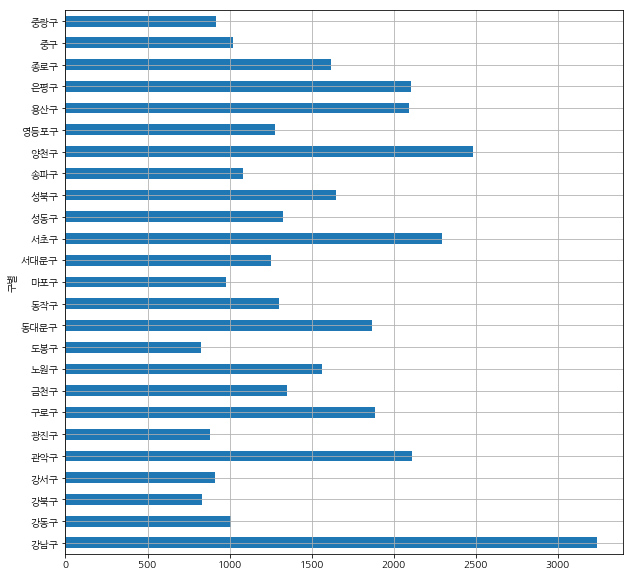

In [0]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

plt.rcParams['axes.unicode_minus']=False
path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font_name = font_manager.FontProperties(fname = path).get_name()
rc('font', family=font_name)

data_result['소계'].plot(kind='barh', grid=True, figsize=(10,10))
plt.show()

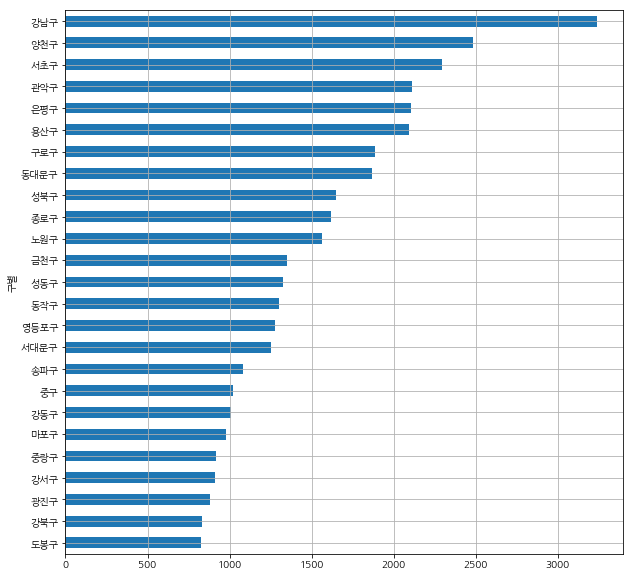

In [0]:
data_result['소계'].sort_values().plot(kind='barh', grid=True, figsize=(10,10))
plt.show()

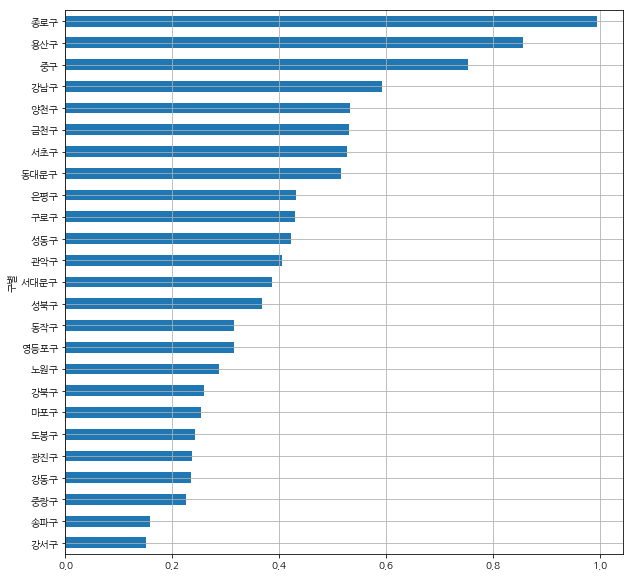

In [0]:
data_result['CCTV비율'] =  data_result['소계']/data_result['인구수'] *100
data_result['CCTV비율'].sort_values().plot(kind='barh', grid=True, figsize=(10,10))
plt.show()

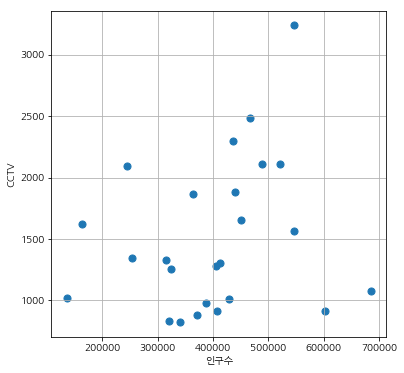

In [0]:
plt.figure(figsize=(6,6))
plt.scatter(data_result['인구수'], data_result['소계'], s=50)
plt.xlabel('인구수')
plt.ylabel('CCTV')
plt.grid()
plt.show()

In [0]:
fp1 = np.polyfit(data_result['인구수'], data_result['소계'], 1)
fp1

array([1.04688835e-03, 1.09426238e+03])

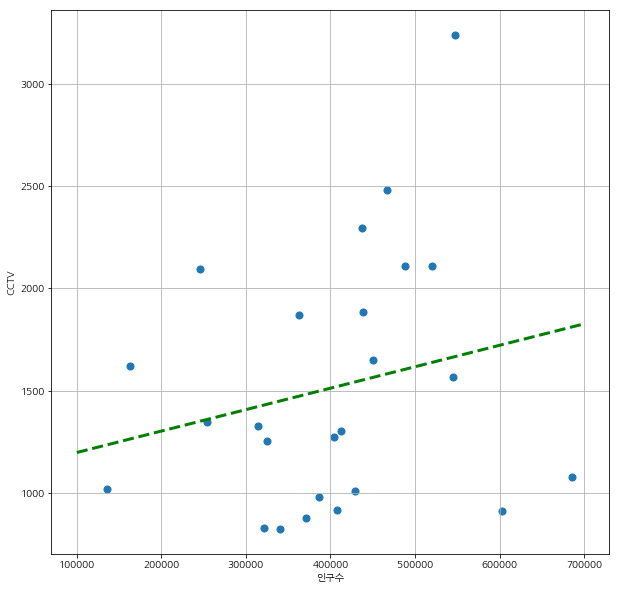

In [0]:
f1 = np.poly1d(fp1)
fx = np.linspace(100000, 700000, 100)
plt.figure(figsize=(10,10))
plt.scatter(data_result['인구수'], data_result['소계'], s=50)
plt.plot(fx, f1(fx), ls='dashed', lw=3, color='g')
plt.xlabel('인구수')
plt.ylabel('CCTV')
plt.grid()
plt.show()

In [0]:
data_result['오차'] = np.abs(data_result['소계'] - f1(data_result['인구수']))

df_sort = data_result.sort_values(by='오차', ascending=False)
df_sort.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율,오차
구별,,,,,,,,,,
강남구,3238,150.619195,546875,541854,5021,68104,0.918126,12.453303,0.592091,1571.220548
양천구,2482,34.671731,466622,462599,4023,58930,0.862154,12.629066,0.531908,899.236479
강서구,911,134.793814,602886,596287,6599,80903,1.094568,13.419287,0.151107,814.416716
서초구,2297,63.371266,437007,432762,4245,55366,0.971380,12.669362,0.525621,745.240078
용산구,2096,53.216374,245139,229168,15971,38049,6.515079,15.521398,0.855025,745.104452


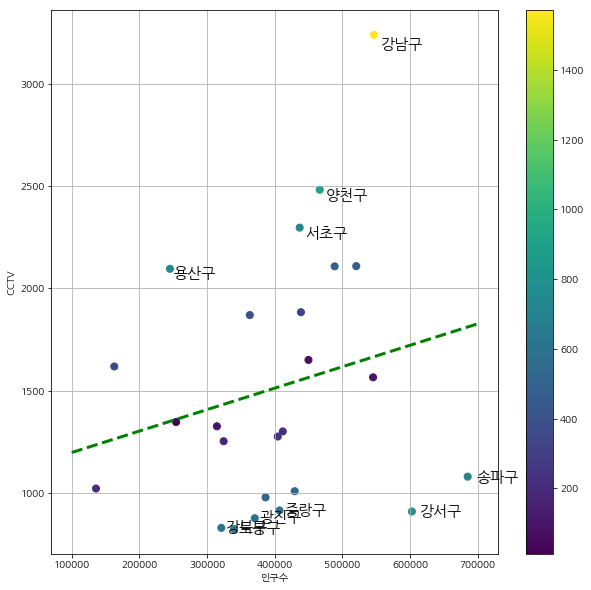

In [0]:
plt.figure(figsize=(10,10))
plt.scatter(data_result['인구수'], data_result['소계'], c=data_result['오차'], s=50)
plt.plot(fx, f1(fx), ls='dashed', lw=3, color='g')

for n in range(10):
  plt.text(df_sort['인구수'][n]*1.02, df_sort['소계'][n]*0.98, df_sort.index[n], fontsize=15)
  
plt.xlabel('인구수')
plt.ylabel('CCTV')

plt.colorbar()
plt.grid()
plt.show()